# CLUSTERING

the fit predict gives the cluster assignment of the points.<br>
can also use hierarchical clustering and density clustering<br> 
NOTE: dbscan cannot assign new points, whilst with Kmeans we can add and compute new points<br>
the evaluation can be done with silhouette <br>
the silhouette is quite expensive to be computed due to the amount of points that must be evaluated (it clashes with the simplicity of Kmeans)
<br> we can under sample the points or compute the silhouette score only among centroids <br>
can also use the ars score for external evaluation <br>
adjusted rand index is used to avoid the case of the clustering creating a random assignment and getting some points

In [ ]:
from sklearn.datasets import make_blobs # generates some random cluster

x, y = make_blobs(n_samples=100, n_features=2, centers=5)



array([[ 6.70351602e+00,  3.13578791e-02],
       [ 5.59871522e+00, -6.18896198e-01],
       [-8.01845712e-01, -5.81760460e+00],
       [ 3.32704108e+00, -8.65573546e+00],
       [-3.14215491e-01,  3.23744262e-01],
       [ 1.63303179e+00, -6.67914671e+00],
       [ 2.12001317e-02,  2.58267653e+00],
       [ 4.12759292e+00,  1.10930171e+00],
       [ 8.23949148e-01, -6.83919541e+00],
       [ 5.97086555e+00,  8.22909848e+00],
       [ 7.25340572e+00, -8.83856213e-01],
       [ 7.19267353e-01, -8.60480372e+00],
       [ 4.74847508e+00,  8.40958309e+00],
       [-4.15674543e-01,  3.27013886e+00],
       [ 5.61831013e-01,  4.55378076e+00],
       [-2.59015435e-03, -6.50690773e+00],
       [ 4.66854941e+00,  6.74356123e-01],
       [-5.42151112e-01,  4.31864218e+00],
       [ 6.16338976e+00, -2.95581378e-01],
       [ 5.54444767e+00, -1.90988359e+00],
       [ 4.72553194e-01,  3.47645744e+00],
       [-1.00253753e+00,  2.73479788e+00],
       [ 5.20692558e-01,  3.97473092e+00],
       [ 2.

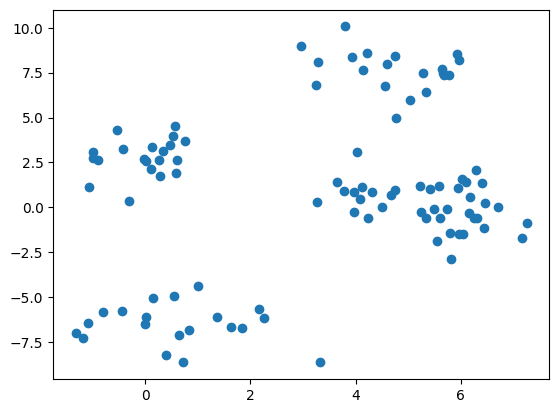

In [12]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1])

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)

km.fit_predict(x)

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 3, 2, 0, 3, 1, 1, 0, 2, 1, 2, 2, 1, 1,
       1, 3, 2, 3, 3, 2, 1, 2, 3, 2, 2, 2, 3, 3, 1, 0, 1, 1, 0, 1, 1, 3,
       3, 2, 1, 0, 3, 3, 3, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 3, 1, 0, 2,
       0, 2, 2, 2, 1, 2, 2, 2, 3, 1, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 0,
       3, 3, 3, 2, 0, 2, 0, 3, 0, 2, 2, 0], dtype=int32)

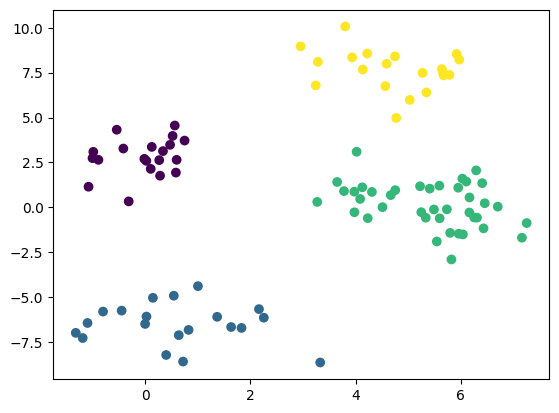

In [11]:
c_pred = km.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=c_pred)

In [68]:
import numpy as np

x, y = make_blobs(n_samples=5_000, n_features=10, centers=np.random.randint(4, 10), cluster_std=5) # cluster std makes the cluster less cohese and more sparse

In [18]:
km = KMeans(2)
c_pred = km.fit_predict(x)

In [44]:
centroids = km.cluster_centers_

In [45]:
centroids[c_pred]

array([[ 7.50050277,  5.31717572,  3.28835481, ..., -1.92871292,
         6.74341668,  6.02284362],
       [-2.82202446,  0.33148228, -2.37427664, ...,  4.66616397,
        -5.52509285, -2.23419642],
       [-2.82202446,  0.33148228, -2.37427664, ...,  4.66616397,
        -5.52509285, -2.23419642],
       ...,
       [-2.82202446,  0.33148228, -2.37427664, ...,  4.66616397,
        -5.52509285, -2.23419642],
       [-2.82202446,  0.33148228, -2.37427664, ...,  4.66616397,
        -5.52509285, -2.23419642],
       [ 7.50050277,  5.31717572,  3.28835481, ..., -1.92871292,
         6.74341668,  6.02284362]])

In [28]:
centroids = np.array([[1,1,1], [2,2,2]])

In [ ]:
centroids[[0,1,0, 1]] # fancy fucking indexing

array([[1, 1, 1],
       [2, 2, 2],
       [1, 1, 1],
       [2, 2, 2]])

In [ ]:
sse = ((x - centroids[c_pred])**2).sum()

np.float64(746534.4676946489)

np.float64(0.2886391890876042)

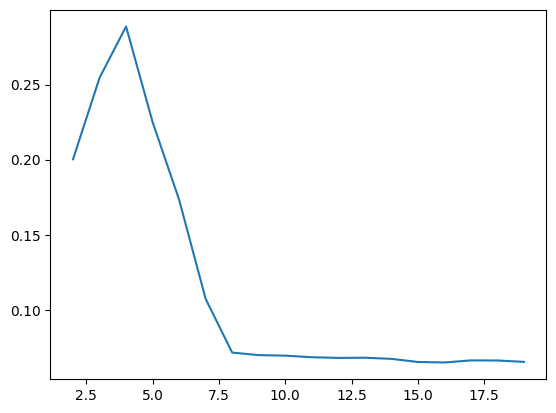

In [69]:
from sklearn.metrics import silhouette_score

sil = list()
val = list() 
for k in range(2, 20):
    km = KMeans(k)
    c_pred = km.fit_predict(x)
    centroids = km.cluster_centers_
    val.append(((x - centroids[c_pred])**2).sum())
    sil.append(silhouette_score(x, c_pred))
    
    
# plt.plot(range(2,20), val)
plt.plot(range(2,20), sil)
max(sil)


In [ ]:
silhouette_score(x, c_pred)


np.float64(0.0632821997041326)

In [71]:
import pandas as pd

from sklearn.metrics.pairwise import euclidean_distances




In [82]:
df = pd.DataFrame(([1,2], [2,'luca']), columns=['col1', 'col2'], index=['a', 'b'])
# df.to_json('pippo.json')

df['col2']

x = pd.Series(['2', 2, 2.0], index=['due', '2', 2.0])
x.index

for index in x.index:
    print(type(index))

<class 'str'>
<class 'str'>
<class 'float'>
